In [1]:
import os, sys
sys.path.append("../")
import io, urllib
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance
import json

In [2]:
#GET SIMILARITY MATRIX

with open("stats_outputs/lexical_similarity/pairwise_lex_similarity.json", "r") as f:
    similarity_dict = json.load(f)

langs = list(similarity_dict.keys())
N = len(langs)
similarity = [[similarity_dict[langs[i]][langs[j]] for j in range(N)] for i in range(N)]
similarity = np.asarray(similarity)

In [3]:
len(similarity)

31

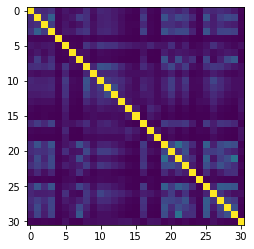

In [4]:
plt.imshow(similarity, interpolation="nearest")

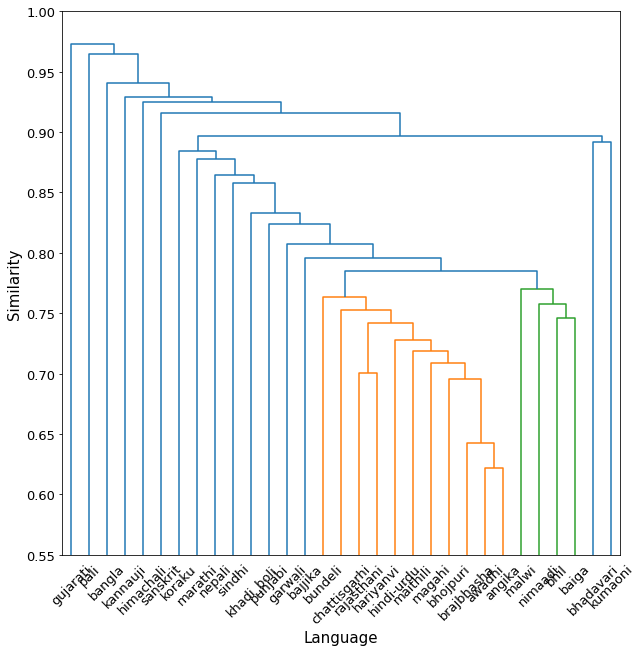

In [17]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
dissimilarity = distance.squareform(1 - similarity)
threshold = 5
linkage = hierarchy.linkage(dissimilarity, method="single")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
plt.figure(figsize=(10,10))
# plt.subplot(500)
dendro = hierarchy.dendrogram(linkage, color_threshold=0.78, labels = langs)
ax = plt.gca()
plt.xlabel("Language")
plt.ylabel("Similarity")
plt.ylim(0.55, 1)
# plt.show()
# fig = dendro.get_figure()
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=13)

plt.savefig("dendrogram_lexical_similarity.png", bbox_inches = "tight")

In [22]:
(1-similarity<=1).all()

True

In [39]:
dissimilarity[:20]

array([0.93096624, 0.90608834, 0.85765443, 0.82779199, 0.99546691,
       0.9903568 , 0.8339464 , 0.89722222, 0.85444015, 0.8272458 ,
       0.79861957, 0.95816805, 0.93698748, 0.95414462, 0.90821171,
       0.91311344, 0.95866315, 0.84798868, 0.88346238, 0.87778855])